<a href="https://colab.research.google.com/github/14marcos1/ELT574_51687_ATIVIDADE_1_/blob/main/atividade2_marcos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ELT574 - Aprendizado de Máquinas**
**Curso de Especialização em Inteligência Artificial e Computacional**



## Semana 2 - Redes Neurais Artificiais

Preparação do ambiente de programação e importação das principais bibliotecas.

### Aula 03 - Redes perceptron multicamadas (classificação)

Construindo modelos de rede perceptron multicamadas com a biblioteca Keras do TensorFlow

In [2]:
#Importando as bibliotecas para análise do problema e configurando o notebook

## OS para executar comandos de diretorio
import os

## Habilitar Google Drive no Colab
# from google.colab import drive
# drive.mount('/content/drive')

## NumPy para manipular matrizes e vetores
import numpy as np

## Pandas para manipular os dataframes
import pandas as pd

## Plotar figuras bonitas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

print('Setup completo!')

Setup completo!


In [3]:
import tensorflow as tf
from tensorflow import keras

##### Classificador de imagens com Keras

Vamos utilizar o dataset fashion MNIST. O MNIST é um dataset de imagens para problemas de classificação multiclasse.

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

Este dataset já contem os dados de treinamento e teste separados. O dataset de treinamento é composto por 60.000 imagens com 28x28 pixels.

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28)

Já o dataset de teste é composto por 10.000 imagens de 28x28 pixels.

In [6]:
X_test.shape

(10000, 28, 28)

Cada pixel das imagens é representado por um valor em escala de cinza, que vai de 0 a 255. O tipo das entradas é inteira, sem sinal, de 8 bits.

In [7]:
X_train_full.dtype

dtype('uint8')

###### Separando os dados para validação durante o treinamento

Vamos dividir o dataset de treinamento para separmos um conjunto de validação que será utilizado durante o treinamento. Como o valor máximo de cada pixel pode ser 255, vamos normalizar o valor dos pixels para um valor float entre 0 e 1.

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255. #o ponto em 255. caracteriza a conversao para float
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Podemos plotar as imagens do dataset utilizando o `imshow()` da biblioteca `matplotlib` com a cor em escala de cinza (mapeamento binário, `'binary'`).





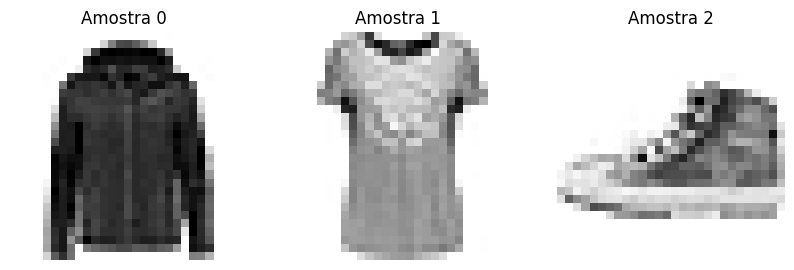

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(131)
plt.imshow(X_train[0], cmap="binary")
plt.title('Amostra 0')
plt.axis('off')

plt.subplot(132)
plt.imshow(X_train[1], cmap="binary")
plt.title('Amostra 1')
plt.axis('off')

plt.subplot(133)
plt.imshow(X_train[2], cmap="binary")
plt.title('Amostra 2')
plt.axis('off')
plt.show()

Repare abaixo que os valores armazenados para o rótulo das classes são valores numéricos. Cada classe possui um número que representa:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot




In [10]:
print(y_train)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

[4 0 7 ... 3 0 5]


Sendo assim, a primeira imagem do dataset de treinamento é:

In [11]:
class_names[y_train[0]]

'Coat'

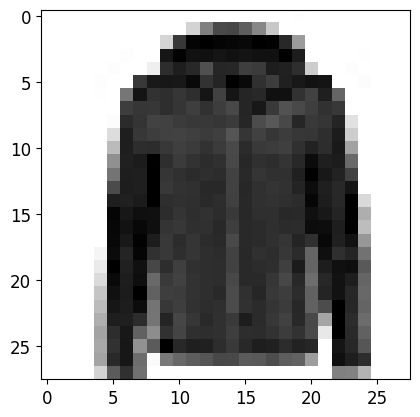

In [12]:
plt.imshow(X_train[0], cmap="binary")

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_y = pd.DataFrame(y_train)

In [14]:
df_y.value_counts()

,count
0,
0,5543
4,5512
8,5510
6,5507
5,5507
3,5499
2,5496
9,5494
7,5488


Algumas das imagens do dataset de treinamento:

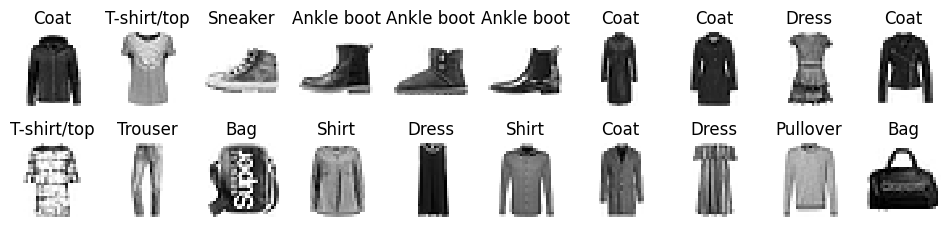

In [15]:
n_rows = 2
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

###### Criando o modelo de PMC

Vamos criar um modelo de PMC para classificar as amostras! Como é um problema com imagens, vamos ajustar uma rede com duas camadas escondidas.

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax")
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Outra maneira de declarar o modelo sequencial com Keras poderia ser:

A estrutura do modelo pode ser verificada por:

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

E as camadas do modelo por:

In [18]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_2, built=True>]

Podemos atribuir uma camada a uma variável para manipular os parâmetros da camada.

In [19]:
hidden1 = model.layers[1]
hidden1

<Dense name=dense, built=True>

Os parâmetros de cada camada podem ser acessados e alterados com os métodos `get_weights()` e `set_weights()`

In [20]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02290282,  0.03966575,  0.02148568, ..., -0.01216517,
         0.04525719,  0.02285004],
       [-0.014031  ,  0.01757333,  0.02860412, ..., -0.030039  ,
        -0.01393983, -0.01406487],
       [ 0.03916014, -0.06493443, -0.0298977 , ...,  0.04046165,
         0.06713925, -0.04219008],
       ...,
       [-0.03445835, -0.01532791, -0.02091512, ...,  0.02875601,
         0.06690943,  0.00298789],
       [ 0.04277334, -0.05572131, -0.03852982, ...,  0.03240743,
         0.02127745,  0.02659984],
       [-0.01390653, -0.01980815, -0.03276562, ..., -0.02991055,
         0.01097559,  0.04337994]], dtype=float32)

In [21]:
weights.shape

(784, 512)

In [22]:
biases.shape

(512,)

A finalização do modelo é feita compilando as últimas informações que devem ser repassadas à estrutura do PMC, a função de otimização, o otimizador e o indicador de métrica.

In [23]:
callbacks = [
    keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=2),
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
]
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

A função de otimização `'sparse_categorical_crossentropy'` é utilizada porque cada saída está rolutada de 0 a 9. Se fosse um vetor dummy (`[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]`), poderíamos utilizar a função `'categorical_crossentropy'`.

Se fosse um problema de classificação binária, utilizaríamos a função `'binary_crossentropy'` e a função de ativação `'sigmoid'` como função de ativação na camada de saída.

###### Treinando o modelo de PMC

O treinamento do modelo é feito utilizando o método `'fit()'` para a classe model.

In [ ]:
# dados
# instanciar o modelo
# treinar
# avaliar

In [24]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_valid, y_valid),
    callbacks=callbacks
)


Epoch 1/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.6659 - loss: 1.0175 - val_accuracy: 0.8484 - val_loss: 0.4451 - learning_rate: 1.0000e-04
Epoch 2/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8335 - loss: 0.4751 - val_accuracy: 0.8664 - val_loss: 0.3867 - learning_rate: 1.0000e-04
Epoch 3/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8512 - loss: 0.4187 - val_accuracy: 0.8746 - val_loss: 0.3581 - learning_rate: 1.0000e-04
Epoch 4/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8656 - loss: 0.3781 - val_accuracy: 0.8774 - val_loss: 0.3447 - learning_rate: 1.0000e-04
Epoch 5/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8734 - loss: 0.3532 - val_accuracy: 0.8844 - val_loss: 0.3281 - learning_rate: 1.0000e-04
Epoch 6/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8758 - loss: 0.3410 - val_accuracy: 0.8856 - val_loss: 0.3232 - learning_rate: 1.0000e-04
Epoch 7/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step

Outra forma de dividir o dataset para treinamento e validação (ao invés de usar o argumento `validation_data`) é utilizar o argumento `validation_split=0.1` para passar a quantidade de dados que devem ser utilizados para a validação durante a fase de treinamento.

###### Analisando os resultados do treinamento

O treinamento do modelo armazenou o histórico de todas as épocas no dicionário `history`. Podemos transformar este dicionário em um DataFrame do Pandas e manipular os dados dele para identificar o melhor modelo treinado.

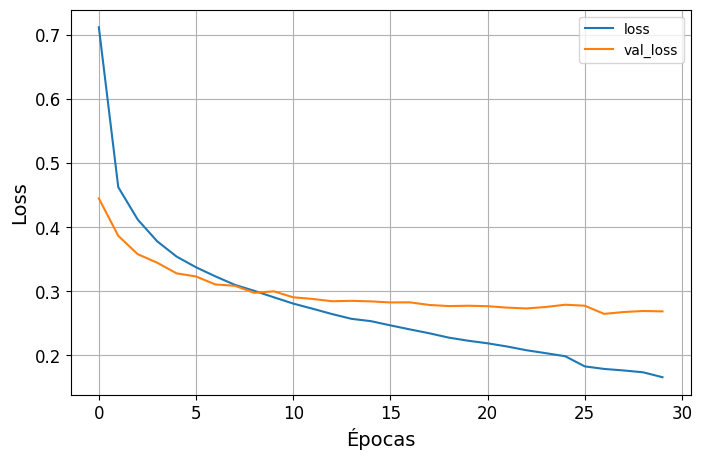

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({
    "loss": history.history["loss"],
    "val_loss": history.history["val_loss"]
})

df.plot(figsize=(8,5))
plt.grid(True)
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.show()


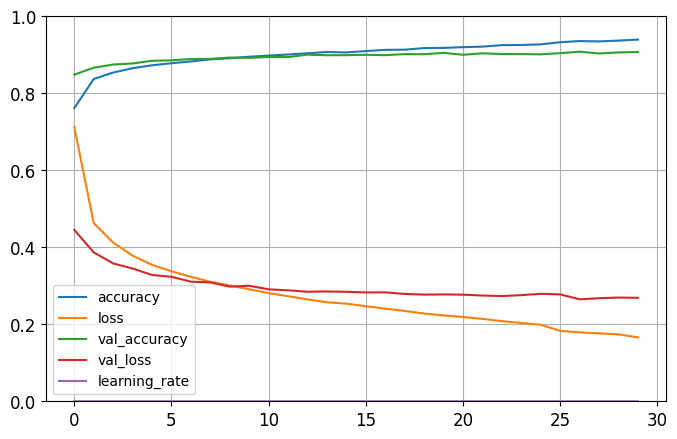

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # ajusta o eixo y para os limites de 0 a 1
plt.show()

Conseguimos um bom desempenho com este modelo e sem uma tendência de overfitting. Podemos ver isto porque o `loss` e o `val_loss`continuam diminuindo, apesar do `val_loss` estar com uma inclinação quase nula no final da última época treinada. Se o modelo continuasse o ajuste dos parâmetros, o `loss` continuaria descendo, mas, provavelmente, o `val_accuraccy` deixaria de acompanhar o `accuraccy` de treinamento.

Se o comportamento do modelo não foi satisfatório ainda depois do treinamento, podemos alterar os hiperparâmetros de treinamento, começando pela taxa de aprendizagem, o otimizador, número de camadas, número de neurônios por camada e os tipos de função de ativação.

Uma vez satisfeito com o modelo, podemos utilizar o dataset de teste para verificar mais uma vez o desempenho do PMC.

In [27]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8993 - loss: 0.3018


[0.2983691990375519, 0.8967000246047974]

In [28]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, np.argmax(y_pred,axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[865,   1,  18,  16,   3,   1,  90,   0,   6,   0],
       [  4, 973,   1,  17,   2,   0,   2,   0,   1,   0],
       [ 18,   0, 834,  13,  76,   0,  59,   0,   0,   0],
       [ 17,   7,  10, 905,  31,   0,  25,   0,   5,   0],
       [  1,   1,  87,  30, 821,   0,  58,   0,   2,   0],
       [  0,   0,   0,   1,   0, 966,   0,  17,   1,  15],
       [118,   1,  84,  27,  52,   0, 709,   0,   9,   0],
       [  0,   0,   0,   0,   0,  16,   0, 961,   0,  23],
       [  7,   0,   3,   7,   1,   1,   3,   4, 974,   0],
       [  0,   0,   0,   0,   0,   7,   1,  33,   0, 959]])

In [32]:
## matriz de confusão

print("Matrix de confusão")
plt.show()


corrMatrix = X_test[used_features].corr()
plt.matshow(corrMatrix)
plt.show()

f = plt.figure(figsize=(10, 10))
plt.matshow(corrMatrix, fignum=f.number)
plt.xticks(range(X_test[used_features].shape[1]), X_test[used_features].columns, fontsize=10, rotation=90)
plt.yticks(range(X_test[used_features].shape[1]), X_test[used_features].columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)


Matrix de confusão


NameError: name 'used_features' is not defined

###### Utilizando o modelo para fazer predições

Acertado o modelo, podemos começar a fazer predições para aplicação. Vamos tomar algumas amostras do dataset de teste para verificar as predições.

In [33]:
X_new = X_test
y_proba = model.predict(X_new)
y_proba.round(5)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 7.6000e-04, 0.0000e+00,
        9.9875e-01],
       [6.0000e-05, 0.0000e+00, 9.9934e-01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.8000e-04, 0.0000e+00, 5.0000e-05, ..., 0.0000e+00, 9.9971e-01,
        0.0000e+00],
       [0.0000e+00, 9.9998e-01, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e-05, 1.0000e-05, 4.0000e-05, ..., 2.4200e-03, 7.0000e-05,
        1.0000e-05]], dtype=float32)

In [36]:
for i in y_proba:
  print(i.round(3))

A saída de streaming foi truncada nas últimas 5000 linhas.
[0.001 0.    0.946 0.    0.008 0.    0.045 0.    0.    0.   ]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0.549 0.    0.01  0.002 0.041 0.    0.376 0.    0.022 0.   ]
[0.    0.    0.005 0.    0.995 0.    0.    0.    0.    0.   ]
[0.    0.    0.011 0.    0.241 0.    0.747 0.    0.    0.   ]
[0.002 0.016 0.001 0.977 0.001 0.    0.002 0.    0.001 0.   ]
[0.001 0.015 0.003 0.96  0.016 0.    0.002 0.    0.002 0.   ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.    0.001 0.04  0.007 0.949 0.    0.    0.    0.002 0.   ]
[0.    0.    0.    0.    0.    0.    0.    0.893 0.    0.107]
[0.999 0.    0.    0.    0.    0.    0.001 0.    0.    0.   ]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0.008 0.001 0.07  0.552 0.225 0.001 0.092 0.    0.052 0.001]
[0.    0.    0.    0.    0.    0.999 0.    0.    0.    0.001]
[0.312 0.012 0.002 0.16  0.001 0.    0.513 0.    0.    0.   ]
[0.002 0.004 0.114 0.    0.878 0.    0.001 0.    0.    0.   ]
[0.99 0.   0.   0.   0.   0.   0.01 0. 

In [37]:
list(y_test[:3])

[np.uint8(9), np.uint8(2), np.uint8(1)]

In [38]:
y_pred = np.argmax(y_proba,axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [39]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

In [40]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

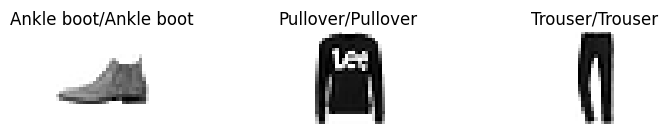

In [41]:
n_rows = 1
n_cols = 3
plt.figure(figsize=(n_cols * 3, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_test[index]] + '/' + class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()